In [1]:
import numpy as np
import pandas as pd
df = pd.DataFrame({
    'A' : [1, np.nan, 3, 4, 5],
    'B' : [6, 7, 8,np.nan, 10],
    'C' : [11, 12, 13, 14, 15]
})
df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


In [2]:
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [3]:
from sklearn.preprocessing import Imputer
# 平均値で欠損値を補完する
imp = Imputer(strategy = 'mean', axis = 0)
imp.fit(df)
imp.transform(df)

array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

In [4]:
import numpy as np
import pandas as pd
df = pd.DataFrame({
    'A' : [1, 2, 3, 4],
    'B' : ['a', 'b', 'c', 'a'],
})
df

,A,B
0,1,a
1,2,b
2,3,c
3,4,a


In [5]:
from sklearn.preprocessing import LabelEncoder
# ラベルエンコーダ
# 文字列などのデータを扱えるように a->0, b->1 の変換テーブルを作成する
# ラベルエンコーダは1列単位でないと扱えない
le = LabelEncoder()
le.fit(df['B'])
# ラベルエンコーダでの変換後の値はnumpy
le_t = le.transform(df['B'])
le_t

array([0, 1, 2, 0], dtype=int64)

In [6]:
# dfの値はまだ変わってない
df

,A,B
0,1,a
1,2,b
2,3,c
3,4,a


In [7]:
# 元の値を確認
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [8]:
# 変換後の値をdfに代入
df['B'] = le_t

In [9]:
df

,A,B
0,1,0
1,2,1
2,3,2
3,4,0


In [10]:
print(type(df['B']))
print(type(pd.DataFrame(df['B'])))
print(type(df.iloc[:, 1:2]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [11]:
from sklearn.preprocessing import OneHotEncoder
# ラベルエンコーダだけでは、0,1,2のような数値的な意味がでてきてしまう。 b+b=c(1+1=2)のような
# OneHotエンコードを実施する
ohe = OneHotEncoder()
# OneHotEncoderはDataFrameで渡さないとダメ
# B列のみをエンコードしたいのでilocを使用
ohe.fit(df.iloc[:, 1:2])
ohe_t = ohe.transform(df.iloc[:, 1:2]).toarray()
ohe_t

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [12]:
# B列をOneHotエンコードしたので連結する
pd.concat([df.iloc[:,0:1], pd.DataFrame(ohe_t)], axis=1)

,A,0,1,2
0,1,1.0,0.0,0.0
1,2,0.0,1.0,0.0
2,3,0.0,0.0,1.0
3,4,1.0,0.0,0.0


In [13]:
df = pd.DataFrame({
    'A' : [1, 2, 3, 4],
    'B' : [100, 200, 300, 400],
})
df

,A,B
0,1,100
1,2,200
2,3,300
3,4,400


In [14]:
from sklearn.preprocessing import StandardScaler
# 分散正規化
sts = StandardScaler()
sts.fit(df)
sts.transform(df)

array([[-1.34164079, -1.34164079],
       [-0.4472136 , -0.4472136 ],
       [ 0.4472136 ,  0.4472136 ],
       [ 1.34164079,  1.34164079]])

In [15]:
from sklearn.preprocessing import MinMaxScaler
# 分散正規化
mms = MinMaxScaler()
mms.fit(df)
mms.transform(df)

array([[0.        , 0.        ],
       [0.33333333, 0.33333333],
       [0.66666667, 0.66666667],
       [1.        , 1.        ]])

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
print(X[0])
print(len(X))
print(y[0])
print(len(y))

[5.1 3.5 1.4 0.2]
150
0
150


In [17]:
from sklearn.model_selection import train_test_split
# 学習データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [18]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)
X0 = np.random.uniform(size=(100, 2))
y0 = np.repeat(0, 100)
X1 = np.random.uniform(-1.0, 0.0, size=(100, 2))
y1 = np.repeat(1, 100)

fig, ax = plt.subplots()
ax.scatter(X0[:, 0], X0[:, 1], marker = 'o', label='class 0')
ax.scatter(X1[:, 0], X1[:, 1], marker = 'x', label='class 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

In [19]:
from sklearn.svm import SVC
# サポートベクタマシン
def plot_boundary_margin_sv(X0, y0, X1, y1,kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1):
    svc = SVC(kernel=kernel, C=C)
    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))
    
    fig, ax = plt.subplots()
    ax.scatter(X0[:, 0], X0[:, 1], marker = 'o', label='class 0')
    ax.scatter(X1[:, 0], X1[:, 1], marker = 'x', label='class 1')
    
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=250, facecolors='none', edgecolors='black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    plt.show()
    


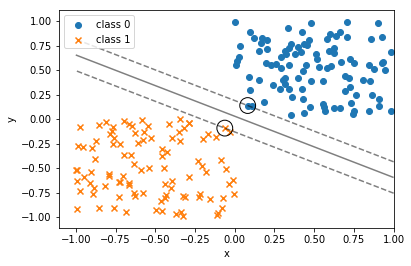

In [20]:
plot_boundary_margin_sv(X0, y0, X1, y1,kernel='linear', C=1e6)

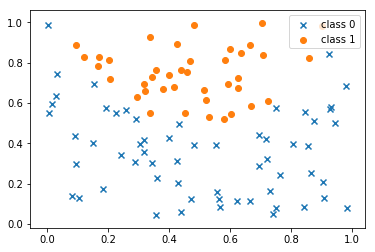

In [21]:
np.random.seed(123)
X = np.random.random(size= (100, 2))
y = (X[:, 1] > 2*(X[:, 0]-0.5)**2 + 0.5).astype(int)
fig, ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label='class 0')
ax.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label='class 1')
ax.legend()
plt.show()

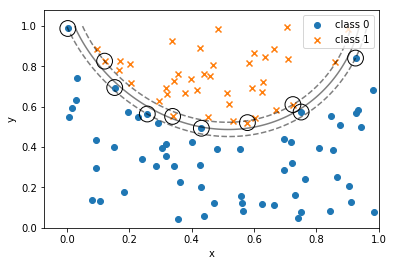

In [22]:
X0, X1 = X[y == 0, :], X[y == 1, :]
y0, y1 = y[y == 0], y[y == 1]
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='rbf', C=1e3, xmin=0, ymin=0)

In [23]:
# 決定木
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
y_p = tree.predict(X_test)
y_p

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [25]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,random_state=123)
forest.fit(X_train, y_train)
y_pred=forest.predict(X_test)
y_pred

D:\program_files\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [26]:
# 回帰
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
y_pred = lr.predict(X_test)

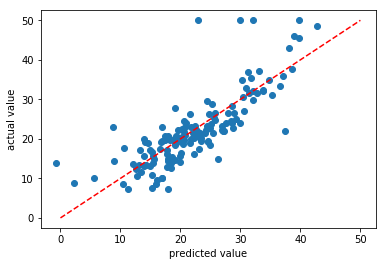

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot((0,50), (0, 50), linestyle='dashed', color='red')
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

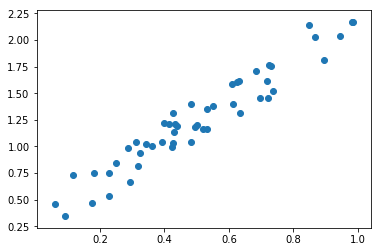

In [29]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
X = np.random.random(size=50)
Y = 2*X + 0.5*np.random.rand(50)
fig, ax = plt.subplots()
ax.scatter(X,Y)
plt.show()

In [30]:
# 主成分分析
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(np.hstack((X[:, np.newaxis], Y[:, np.newaxis])))

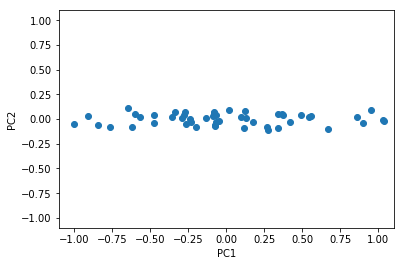

In [31]:
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
plt.show()

In [32]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
iris = load_iris()
X, y = iris.data[:100,:], iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
# 適合率、再現率、F値
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      1.00      1.00        15

avg / total       1.00      1.00      1.00        30



In [34]:
from sklearn.model_selection import cross_val_score
svc = SVC()
cross_val_score(svc, X, y, cv=10, scoring='precision')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# 決定木
clf = DecisionTreeClassifier()
param_grid = {'max_depth': [3,4,5]}
# 10分割の交差検証
cv = GridSearchCV(clf, param_grid=param_grid, cv=10)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [37]:
# 最適な深さ
cv.best_params_

{'max_depth': 3}

In [38]:
# 最適なモデル
cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
y_pred = cv.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])